**Concepts To Learn**



> Introduction to Python's Data Visualization packages: Matplotlib, Seaborn, Plotly

> Visualizing with Histograms, Bar charts, Pie charts, Line graphs, scattered plots, sub plots


In [1]:
import pandas as pd
import gdown


file_id = "1gE9xaUDBdlx4BtXDthsHA0LYq6Qpz-oG"
download_url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(download_url, "fifa.csv", quiet=False)

fifa_df = pd.read_csv("fifa.csv", encoding='latin1')

fifa_df.head()

Downloading...
From: https://drive.google.com/uc?id=1gE9xaUDBdlx4BtXDthsHA0LYq6Qpz-oG
To: /content/fifa.csv
100%|██████████| 9.05M/9.05M [00:00<00:00, 122MB/s]


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,20801,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,190871,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,192985,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


In [2]:
fifa_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

**HISTOGRAMS**


A histogram is used to show how data is distributed, that is, how often different ranges of values occur in a dataset.

<Axes: xlabel='Age', ylabel='Count'>

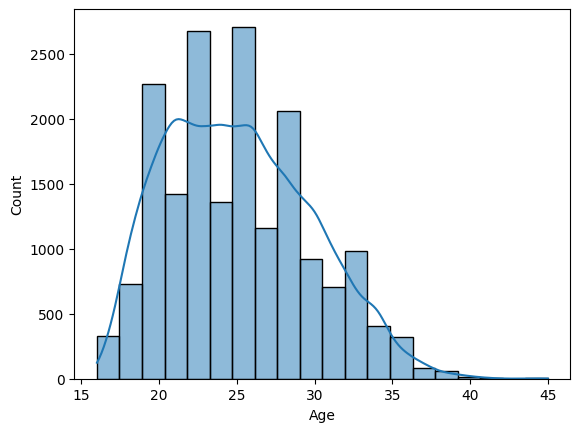

In [5]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Let's check the Age distribution
sns.histplot(fifa_df['Age'], bins=20, kde=True)

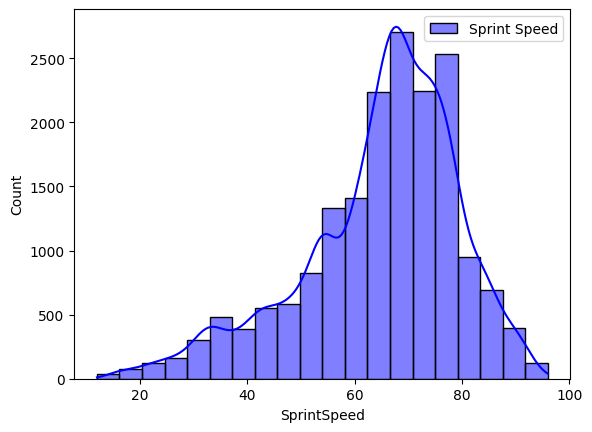

In [10]:
# overlay SprintSpeed and Strength
sns.histplot(fifa_df['SprintSpeed'], bins=20, color='blue', alpha=0.5, label='Sprint Speed', kde=True)
# sns.histplot(fifa_df['Strength'], bins=20, color='red', alpha=0.5, label='Strength')
# sns.histplot(fifa_df['Position'], bins=20, color='blue', alpha=0.5, label='Sprint Speed', kde=True)
plt.legend()

<Axes: xlabel='Height_cm', ylabel='Count'>

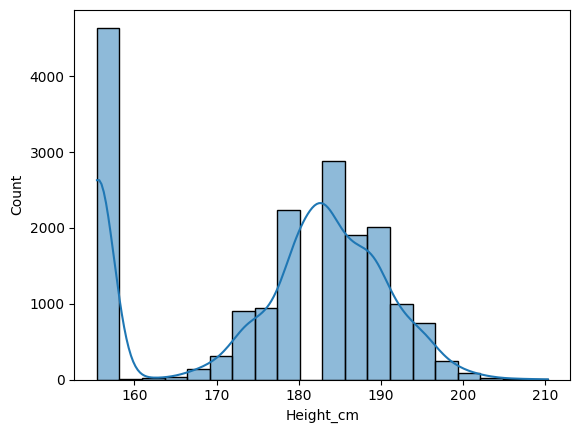

In [12]:
# check Height distribution
fifa_df['Height_cm'] = fifa_df['Height'].str.replace("'", ".").astype(float) * 30.48
sns.histplot(fifa_df['Height_cm'], bins=20, kde=True)

In [13]:
px.histogram(fifa_df, x='Overall', color='Preferred Foot', barmode='overlay')

**BAR CHARTS**

A bar chart is used to compare quantities across distinct categories. While a Histogram shows distribution of values across numeric ranges (bins), a bar chart compares quantities between distinct categories

In [ ]:
# Compare number of players featured from each Position
plt.figure(figsize=(10, 5))
sns.countplot(data=fifa_df, x='Position', order=fifa_df['Position'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Players per Position")
plt.show()

In [ ]:
fig = px.bar(
    fifa_df['Preferred Foot'].value_counts().reset_index(),
    x='Preferred Foot',
    y='count',
    labels={'Preferred Foot': 'Preferred Foot', 'count': 'Count'},
    title='Preferred Foot Distribution'
)
fig.show()

**PIE CHART**

A pie chart is a circular chart divided into slices where each slice represents a category. The size of the slice represents the proportion or percentage that category contributes to the whole and it’s great for showing relative parts of a whole.

In [ ]:
# let's see how each position is represented relative to the entire dataset
position_counts = fifa_df["Position"].value_counts().reset_index()
position_counts.columns = ["Position", "Count"]

# Plot pie chart
fig = px.pie(
    position_counts,
    names="Position",
    values="Count",
    title="Distribution of Position",
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.show()

**Line Graphs**

A line graph (or line chart) is used to show how data changes over a continuous variable, most often time.

It connects individual data points with a line, making it easier to spot trends, patterns, and fluctuations.

In [ ]:
# Use a Line graph to spot if there's a trend of Overall Player Rating vs Age
fig = px.line(fifa_df.sort_values("Age"),
              x="Age",
              y="Overall",
              title="Player Overall Rating vs Age",
              markers=True)
fig.show()

In [ ]:
# What about Shot Power vs Age
fig = px.line(fifa_df.sort_values("Age"),
              x="Age",
              y="ShotPower",
              title="Shot Power vs Age",
              markers=True)
fig.show()

**Scattered Plots**

A scatter plot is used to show the relationship between two numerical variables.
Each point represents one observation in your dataset, with:

The x-axis representing one numeric variable.

The y-axis representing another numeric variable.

Patterns in the points can show correlations, clusters, or outliers.

In [ ]:
# Show relationship between Stamina and Strength

fig = px.scatter(fifa_df, x="Stamina", y="Strength", color="Preferred Foot",
                 title="Stamina Vs Strength",
                 hover_data=["Position"])
fig.show()

In [ ]:
# Show relationship between ShotPower and LongShot

fig = px.scatter(fifa_df, x="ShotPower", y="LongShots", color="Preferred Foot",
                 title="ShotPower Vs LongShots",
                 hover_data=["Position"])
fig.show()

**Sub Plots**

Subplots are used when you want to display multiple plots in a single figure

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Stamina vs Age",
                                    "ShotPower vs Age",
                                    "Jumping vs Age",
                                    "Acceleration vs Age"))

# 1st subplot - Stamina vs Age
fig.add_trace(
    go.Scatter(x=fifa_df["Age"], y=fifa_df["Stamina"], mode='markers', name="Stamina"),
    row=1, col=1
)

# 2nd subplot - ShotPower vs Age
fig.add_trace(
    go.Scatter(x=fifa_df["Age"], y=fifa_df["ShotPower"], mode='markers', name="ShotPower"),
    row=1, col=2
)

# 3rd subplot - Jumping vs Age
fig.add_trace(
    go.Scatter(x=fifa_df["Age"], y=fifa_df["Jumping"], mode='markers', name="Jumping"),
    row=2, col=1
)

# 4th subplot - Acceleration vs Age
fig.add_trace(
    go.Scatter(x=fifa_df["Age"], y=fifa_df["Acceleration"], mode='markers', name="Acceleration"),
    row=2, col=2
)

# Layout adjustments
fig.update_layout(height=800, width=900, title_text="Player Attributes vs Age (Subplots)")

fig.show()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# First subplot: Stamina vs Age
sns.scatterplot(data=fifa_df, x="Age", y="Stamina", ax=axes[0, 0])
axes[0, 0].set_title("Stamina vs Age")

# Second subplot: ShotPower vs Age
sns.scatterplot(data=fifa_df, x="Age", y="ShotPower", ax=axes[0, 1])
axes[0, 1].set_title("ShotPower vs Age")

# Third subplot: Jumping vs Age
sns.scatterplot(data=fifa_df, x="Age", y="Jumping", ax=axes[1, 0])
axes[1, 0].set_title("Jumping vs Age")

# Fourth subplot: Acceleration vs Age
sns.scatterplot(data=fifa_df, x="Age", y="Acceleration", ax=axes[1, 1])
axes[1, 1].set_title("Acceleration vs Age")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()